In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests
from shapely.geometry import Point, Polygon
import collections
data = pd.read_csv("./originalData/wildfiredata.csv")

url = "https://www.zipdatamaps.com/en/postal-code-lists/canada/list-of-all-forward-sortation-areas-in-alberta"
html = requests.get(url).content
table = pd.read_html(html)[-1]
abfsalist = list(table.iloc[:,0])
correctedabfsalist = []

for i in abfsalist:
    if len(i) ==3:
        correctedabfsalist.append(i)


In [6]:
canada = gpd.read_file("./FSAshapedata/lfsa000b21a_e/lfsa000b21a_e.shx")

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


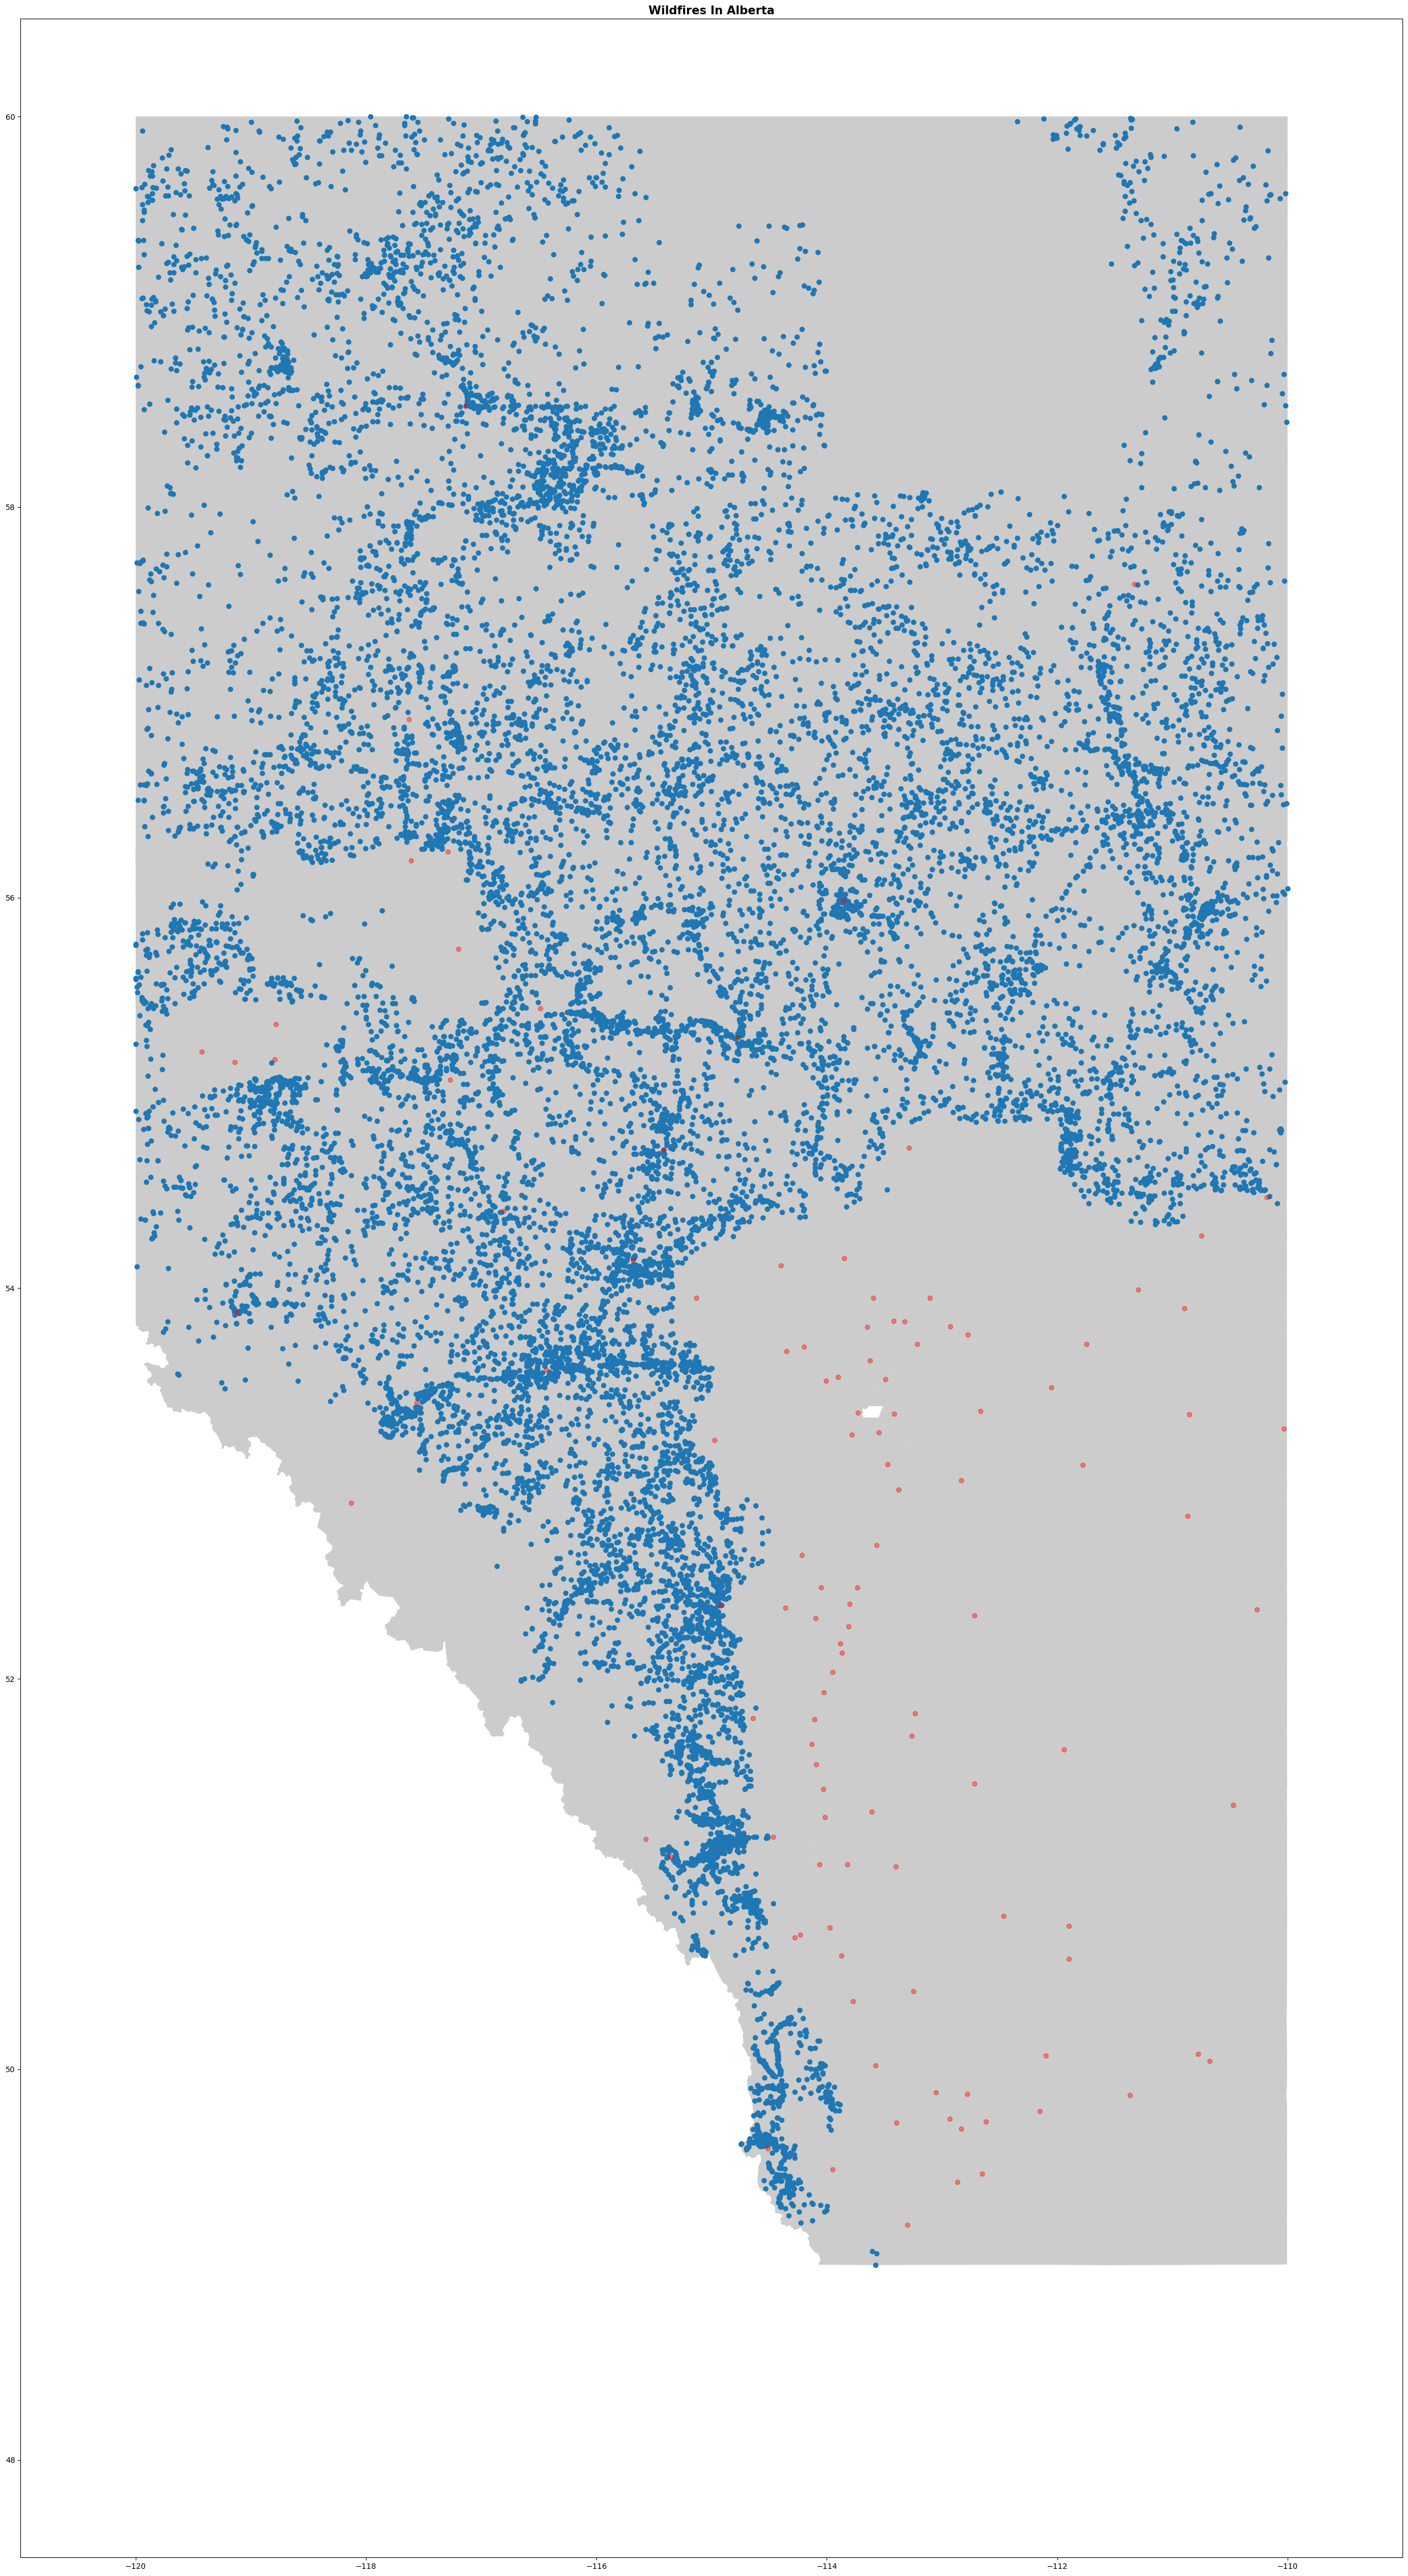

In [9]:
alberta = canada[canada["CFSAUID"].isin(correctedabfsalist)]
#Plotting the cities
citiesdata = pd.read_csv('./originaldata/canadacities.csv')
filteredcitiesdata = citiesdata[citiesdata['province_id'] == 'AB']

# designate coordinate system
crs = {'init':'EPSG:4269'}# zip x and y coordinates into single feature
alberta = alberta.to_crs(crs)
wfgeometry = [Point(xy) for xy in zip(data['fire_location_longitude'], data['fire_location_latitude'])]# create GeoPandas dataframe
citiesgeometry =  [Point(xy) for xy in zip(filteredcitiesdata['lng'], filteredcitiesdata['lat'])]

wildfire_df = gpd.GeoDataFrame(data,
 crs = crs,
 geometry = wfgeometry)

cities_df = gpd.GeoDataFrame(filteredcitiesdata,
 crs = crs,
 geometry = citiesgeometry)

slavelake = cities_df[cities_df['city'] == 'Slave Lake']

fig, ax = plt.subplots(figsize=(60,60))
alberta.plot(ax=ax, alpha=0.4,color='gray')# plots alberta map
wildfire_df.plot(ax =ax)# adds the information]
cities_df.plot(ax=ax, alpha = 0.4, color= 'red')
plt.plot(slavelake['lng'], slavelake['lat'],marker = 'x', color = 'Green')
plt.title('Wildfires In Alberta', fontsize=15,fontweight='bold')# set latitiude and longitude boundaries for map display
plt.xlim( -121,-109)
plt.ylim( 47.5,60.5)# show map
plt.show()

In [11]:
from shapely.geometry import Polygon, LineString, Point
listfsa = list(alberta["CFSAUID"])
dict_fsa = {key: 0 for key in listfsa}
addtocsv = []
toremove = []
x = Point(-159.92697, 59.52214)
for i in wildfire_df.index:
    cnt = 0
    for j in listfsa:
        checkdf = alberta[alberta['CFSAUID']==j]['geometry'].contains(wildfire_df['geometry'][i]).values[0]
        cnt +=1
        if checkdf == True:
            addtocsv.append(j)
            break

        elif cnt == len(listfsa):
                print(i)
                print(wildfire_df['geometry'][i])
                toremove.append(i)
                exit


print(addtocsv)
print(len(addtocsv))

1753
POINT (-114.743933 49.61925)
17392
POINT (-115.076067 50.585333)
20766
POINT (-114.6682 49.645117)
['T0H', 'T0M', 'T0P', 'T9H', 'T7E', 'T0H', 'T0E', 'T0H', 'T7S', 'T0A', 'T0G', 'T0H', 'T0M', 'T1W', 'T0G', 'T0K', 'T0G', 'T0H', 'T0H', 'T0H', 'T0H', 'T7E', 'T0K', 'T0G', 'T7E', 'T7E', 'T0G', 'T7A', 'T7V', 'T0A', 'T0E', 'T7E', 'T7E', 'T0H', 'T0H', 'T0G', 'T3Z', 'T0C', 'T0P', 'T7E', 'T0H', 'T0M', 'T0M', 'T7E', 'T0H', 'T0E', 'T7E', 'T7E', 'T9H', 'T0G', 'T1W', 'T1W', 'T0H', 'T0E', 'T7E', 'T7A', 'T0E', 'T0K', 'T0K', 'T0H', 'T0H', 'T0H', 'T7A', 'T0M', 'T7S', 'T7S', 'T1W', 'T4T', 'T0C', 'T0L', 'T7E', 'T0E', 'T7E', 'T0M', 'T0E', 'T0P', 'T0E', 'T0M', 'T7S', 'T0H', 'T0P', 'T0H', 'T0H', 'T0M', 'T0A', 'T0A', 'T0A', 'T7E', 'T0P', 'T0H', 'T7S', 'T0H', 'T7E', 'T0G', 'T0A', 'T0H', 'T7S', 'T0G', 'T0P', 'T1W', 'T0E', 'T0M', 'T0M', 'T0L', 'T0E', 'T0P', 'T0M', 'T0H', 'T7E', 'T0G', 'T0P', 'T0P', 'T0H', 'T0P', 'T0H', 'T0P', 'T0H', 'T0H', 'T0P', 'T0G', 'T0K', 'T0H', 'T0P', 'T0G', 'T4T', 'T7E', 'T4T', 'T7S',

In [12]:
#summarizing data
def summarize_list(input_list):
    tempdict = {}
    counts = sorted(collections.Counter(input_list).items(), key=lambda item: item[1],reverse=True)
    for i in counts:
        tempdict[i[0]] = i[1]
    return (tempdict)

summary = summarize_list(addtocsv)

print(summary)

{'T0H': 7673, 'T0G': 3365, 'T0P': 1930, 'T1W': 1564, 'T0L': 1421, 'T0M': 1119, 'T0A': 1062, 'T0E': 1013, 'T9H': 836, 'T7E': 748, 'T0K': 692, 'T4T': 617, 'T7S': 280, 'T7V': 237, 'T7A': 195, 'T9S': 55, 'T0C': 36, 'T0J': 19, 'T8W': 17, 'T9M': 15, 'T3Z': 6, 'T9N': 4, 'T9K': 2, 'T4C': 2, 'T8S': 2, 'T8V': 1}


In [18]:
#adding and exporting data
data = pd.read_csv("./originaldata/wildfiredata.csv")

#removing unmarked fires
toremove = [1753,17392,20766]
listtoremove = sorted(toremove, reverse=True)
for i in listtoremove:
    data = data.drop(i, axis="index")


data=data.reset_index()
data=data.drop('index', axis = 'columns')

data.insert(loc=50,column="FSA",value=addtocsv)
print(data)

data.to_csv("DatawithFSA.csv",index=False)

       fire_year fire_number fire_name  current_size size_class  \
0           2021      HWF053       NaN          5.50          C   
1           2021      RWF005       NaN          0.01          A   
2           2021      LWF014       NaN          0.10          A   
3           2021      MWF002       NaN          0.01          A   
4           2021      EWF014       NaN          7.13          C   
...          ...         ...       ...           ...        ...   
22906       2006      CWF231       NaN          0.10          A   
22907       2006      CWF232       NaN          0.01          A   
22908       2006      CWF233       NaN          0.70          B   
22909       2006      CWF234       NaN          0.01          A   
22910       2006      MWF174       NaN          0.01          A   

       fire_location_latitude  fire_location_longitude         fire_origin  \
0                   59.522139              -119.926971     Provincial Land   
1                   52.692262          